In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [3]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
print('data shape: {0}; no. positive: {1}; no. negative: {2}'.format(
    X.shape, y[y==1].shape[0], y[y==0].shape[0]
))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

data shape: (569, 30); no. positive: 357; no. negative: 212


In [4]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [6]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [4]:
from sklearn.svm import SVC

In [5]:
clf = SVC(C=1.0, kernel='rbf', gamma=0.1)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}, test score: {1}'.format(train_score, test_score))

train score: 1.0, test score: 0.6052631578947368


In [6]:
import sys
sys.path.append('..')

In [7]:
from common.utils import plot_param_curve
from sklearn.model_selection import GridSearchCV

best param: {'gamma': 0.00011379310344827585}
best score: 0.9367311072056239


/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


<module 'matplotlib.pyplot' from '/Users/wansizhe/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

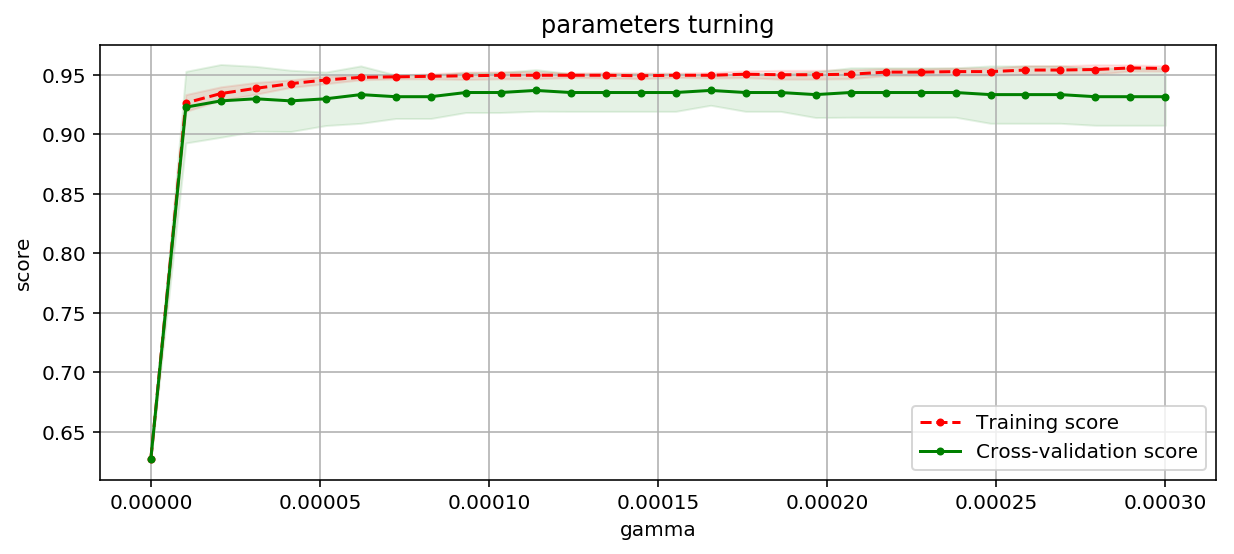

In [8]:
gammas = np.linspace(0, 0.0003, 30)
param_grid = {'gamma': gammas}
clf = GridSearchCV(SVC(), param_grid, cv=5)
clf.fit(X, y)
print("best param: {0}\nbest score: {1}".format(clf.best_params_, clf.best_score_))
plt.figure(figsize=(10, 4), dpi=144)
plot_param_curve(plt, gammas, clf.cv_results_, xlabel='gamma')

In [9]:
import time
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

elaspe: 0.499684


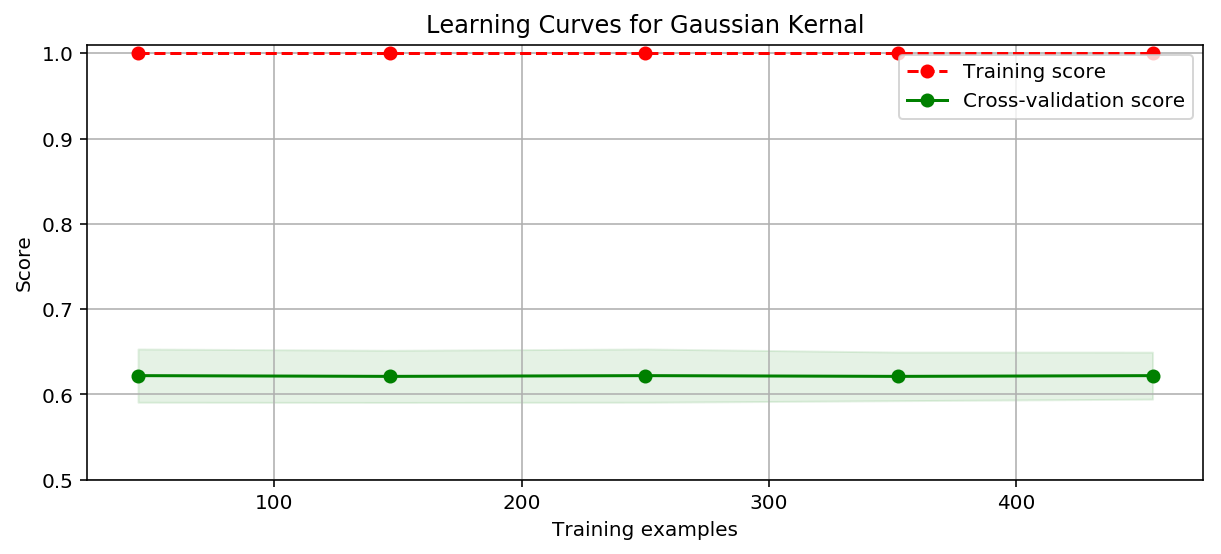

In [10]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
title = 'Learning Curves for Gaussian Kernal'
start = time.clock()
plt.figure(figsize=(10, 4), dpi=144)
plot_learning_curve(plt, SVC(C=1.0, kernel='rbf', gamma=0.01), title, X, y, ylim=(0.5, 1.01), cv=cv)
print('elaspe: {0:.6f}'.format(time.clock()-start))

In [11]:
clf = SVC(C=1.0, kernel='poly', degree=2)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


train score: 0.9824175824175824; test score: 0.956140350877193


elaspe: 0.086701


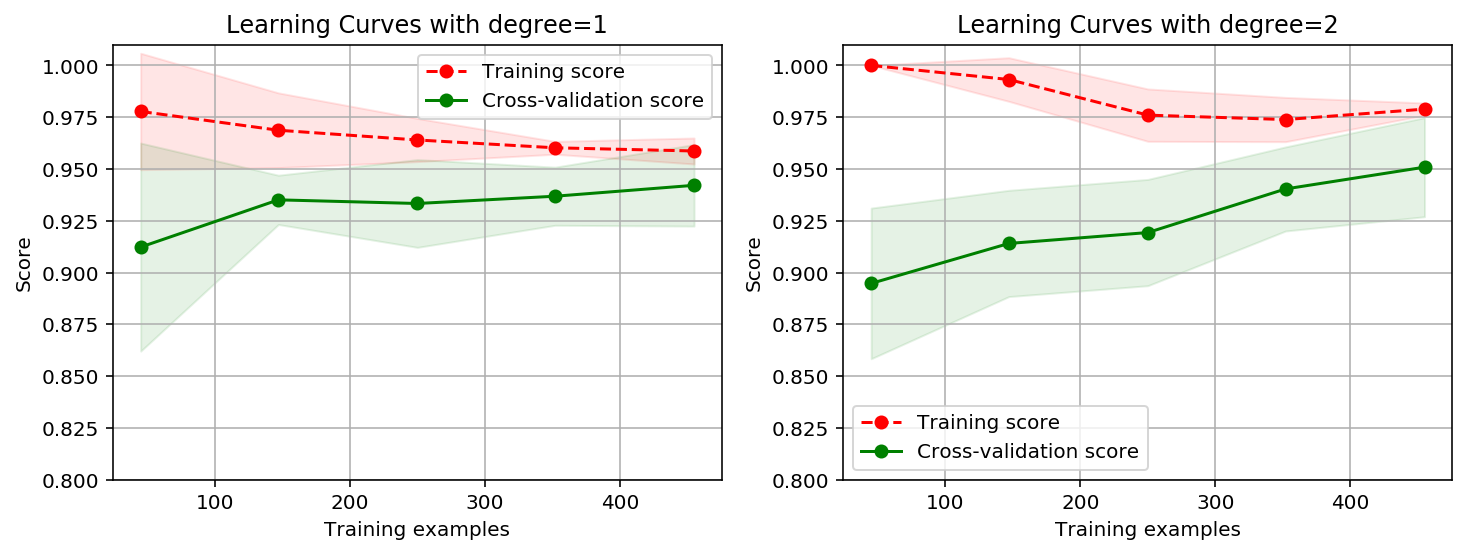

In [14]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
title = 'Learning Curves with degree={0}'
degrees = [1, 2]
start = time.clock()
plt.figure(figsize=(12, 4) ,dpi=144)
for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i+1)
    plot_learning_curve(
        plt,
        SVC(C=1.0, kernel='poly', degree=degrees[i]),
        title.format(degrees[i]),
        X, 
        y,
        ylim=(0.8, 1.01),
        cv=cv,
        n_jobs=4
    )
print('elaspe: {0:.6f}'.format(time.clock()-start))